# COGS 108 - Final Project

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Names

- Andy Liu
- Shane West

# Overview

Our project focused on daily stock price movements in the S&P 500. We set out to find how public sentiment, and ESG score data affected these daily stock prices. We found public sentiment and ESG score data have minimal correlation with the change of daily stock prices.

# Research Question

How accurately can daily stock price movements for S&P 500 companies be predicted using a combination of public sentiment (from social media and news), ESG scores, and quarterly earnings report data? Specifically, how much does each of these factors contribute to the prediction accuracy, and do their impacts vary across different sectors?



## Background and Prior Work


 Predicting stock price movements has long been an issue for investors, and analysts alike. With the rise of data analysis and machine learning, the potential to leverage datasets has changed how predictions are approached. Public sentiment derived from social media platforms and news outlets has emerged as a crucial factor influencing market behavior, reflecting investor emotions and perceptions about companies. Additionally, Environmental, Social, and Governance (ESG) scores have gained prominence as indicators of a company's long-term viability, influencing investor decisions</a>[<sup>2</sup>](#cite_note-2) . Quarterly earnings reports remain at the forefront of financial analysis, providing insights into a company's performance and future outlook. This project seeks to investigate how these elements can be leveraged together to enhance the accuracy of predicting daily stock price movements for S&P 500 companies.

Many different studies have explored the idea of public sentiment affecting stock price. For instance, emotion discourse relayed on the social media forum known as Twitter has been shown to affect the S&P 500 </a>[<sup>1</sup>](#cite_note-1) . The study showed that emotional outburst had a negative correlation with the S&P 500, possibly suggesting that public sentiment could be predictive of stock trends.

Similarly, ESG performance has been shown to have an impact on stock prices, companies with higher ESG scores generally experience better stock performance, especially in sectors where ethical considerations are of great importance.The findings indicate that ESG ratings can significantly influence investor behavior and market valuations, highlighting the need to integrate these scores into predictive models for a more comprehensive analysis </a>[<sup>2</sup>](#cite_note-2) .

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Zhang, X., Fuehres, H., & Gloor, P. A. (2011). Predicting stock market indicators through twitter “I hope it is not as bad as I fear.” Procedia - Social and Behavioral Sciences, 26, 55–62. https://doi.org/10.1016/j.sbspro.2011.10.562. 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kulal, A., N, A., Dinesh, S., & M.S., D. (2023, June). Impact of environmental, social, and governance (ESG) factors on stock prices and investment performance. Macro Management & Public Policies. https://ojs.s-p.sg/index.php/mmpp/article/view/15869 


# Hypothesis



Our main hypothesis is that daily stock price movements for S&P 500 companies can be moderately predicted by combining public sentiment from social media and news, ESG (Environmental, Social, and Governance) scores, and quarterly earnings report data. We predict that while each factor contributes to the prediction accuracy, public sentiment will have the most immediate and significant impact on daily price movements, especially in sectors like technology and consumer goods. ESG scores might have a more gradual, long-term impact, while quarterly earnings will cause short-term volatility around earnings release dates, particularly in sectors like financials and industrials.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: S&P 500 Stocks
  - Link to the dataset: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks
  - Number of observations: ~500
  - Number of variables: 7
- Dataset #2
  - Dataset Name: S&P 500 ESG Risk Ratings
  - Link to the dataset: https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings
  - Number of observations: ~500
  - Number of variables: 9
- Dataset #3
  - Dataset Name: Stock News Events Sentiment (SNES)
  - Link to the dataset: https://www.kaggle.com/datasets/parsabg/stocknewseventssentiment-snes-10
  - Number of observations: ~218K
  - Number of variables: 9

### Dataset #1:
This dataset contains the stocks we will be analyzing. We will refer to the `symbol` of the stock. Key variables include sector, industry, current price, EBITDA (earnings), revenue, and market cap. We will need to align the time interval of the data so that it corresponds to the time interval of our other datasets.

### Dataset #2:
The S&P 500 ESG Risk dataset includes the total ESG risk score, ESG risk and controversy levels, controversy scores, and ESG risk percentiles. While it contains additional variables, we will retain only the `symbols` variable for easier data integration. Note that the dataset does not include a timeline and was last updated five months ago, so all other datasets will need to align with this update schedule.

### Dataset #3: 
The Stock News Events Sentiment (SNES) dataset includes the stocks for our analysis, identified by their symbols. The four key variables for each stock include `Date`, `Symbol`, `News - Volume`, `News - Positive Sentiment`, and `News - Negative Sentiment`. The dataset also includes many other variables that overlaps with other datasets such as financial metrics, which we will leave out.

### Combining Datasets:
We plan to use statistical analysis to conduct our hypothesis. We will feed in aligned data from each dataset.

## Setup/Data Cleaning


In [1]:
## Manipulation and analysis of data
import pandas as pd
import numpy as np
## Basic charts/graphs
import matplotlib.pyplot as plt
## Not currently used
import seaborn as sns


## Load in Companies Dataset
SP_companies_url = 'Data/sp500_companies.csv'
SP_companies = pd.read_csv(SP_companies_url)

## empty dataframe to manipulate to recombine split csv file
## should make this a loop at some point, don't know how to do atm
df = []
## Load in Stock dataset
SP_Stock_url1 = 'Data/sp500_stocks_1.csv'
SP_Stock_url2 = 'Data/sp500_stocks_2.csv'
SP_Stock_url3 = 'Data/sp500_stocks_3.csv'
SP_Stock_temp1 = pd.read_csv(SP_Stock_url1)
SP_Stock_temp2 = pd.read_csv(SP_Stock_url2)
SP_Stock_temp3 = pd.read_csv(SP_Stock_url3)

# Adding all DataFrames to a list
df = [SP_Stock_temp1, SP_Stock_temp2, SP_Stock_temp3]

# Concatenating all DataFrames together
SP_Stock = pd.concat(df, ignore_index=True)

## Load in ESG Risk Rating dataset
SP_ESG_url = 'Data/SP 500 ESG Risk Ratings.csv'
SP_ESG = pd.read_csv(SP_ESG_url)

## Load in Public Sentiment dataset
SP_SNES_url = 'Data/SNES_data.csv'
SP_SNES = pd.read_csv(SP_SNES_url)


## Stocks

In [2]:
# Drop rows with any missing values
SP_Stock.dropna(inplace=True)

# Remove duplicates (if any)
SP_Stock.drop_duplicates(inplace=True)

# Drop unnecessary columns
SP_Stock = SP_Stock.drop(columns=['Shortname', 'Longname', 'S&P500'], errors='ignore')

SP_Stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0


## ESG

In [3]:
## ESG Dataset
ESG_cleaned = SP_ESG[['Symbol', 'Total ESG Risk score', 'Environment Risk Score', 
                      'Governance Risk Score', 'Social Risk Score', 
                      'Controversy Level', 'Controversy Score', 
                      'ESG Risk Percentile', 'ESG Risk Level']]

# Replace missing values with 0
ESG_cleaned = ESG_cleaned.fillna(0)

## Clean Dataset
ESG_cleaned.head()

,Symbol,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,0.0,0.0,0.0,0.0,0,0.0,0,0
1,EMN,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,0.0,0.0,0.0,0.0,0,0.0,0,0
4,DVA,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


## Sentiment

In [4]:
# SNES Dataset
# 1. Select columns we need
SNES_cleaned = SP_SNES[['Date', 'Symbol', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment']]

# 2. Determine missing values
print(f'NaN Values Before Tidying:\n{SNES_cleaned.isna().sum()}\n\n')

# 3. Fill missing sentiment values with 0
SNES_cleaned = SNES_cleaned.fillna(0)
print(f'NaN Values After Tidying:\n{SNES_cleaned.isna().sum()}\n\n')

# 4. Preview cleaned dataset
SNES_cleaned.head()

NaN Values Before Tidying:
Date                           0
Symbol                         0
News - Volume                493
News - Positive Sentiment    493
News - Negative Sentiment    493
dtype: int64


NaN Values After Tidying:
Date                         0
Symbol                       0
News - Volume                0
News - Positive Sentiment    0
News - Negative Sentiment    0
dtype: int64




,Date,Symbol,News - Volume,News - Positive Sentiment,News - Negative Sentiment
0,2020-09-30,MMM,0.0,0.0,0.0
1,2020-10-01,MMM,47.0,0.0,0.0
2,2020-10-02,MMM,43.0,3.0,0.0
3,2020-10-05,MMM,50.0,2.0,3.0
4,2020-10-06,MMM,50.0,0.0,0.0


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

## Correlation and Multivariate Analysis

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')
Index(['Date', 'Symbol', 'News - Volume', 'News - Positive Sentiment',
       'News - Negative Sentiment'],
      dtype='object')
Index(['Symbol', 'Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Level',
       'Controversy Score', 'ESG Risk Percentile', 'ESG Risk Level'],
      dtype='object')
Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Level',
       'Controversy Score', 'ESG Risk Percentile', 'ESG Risk Level',
       'News - Volume', 'News - Positive Sentiment',
       'News - Negative Sentiment'],
      dtype='object')


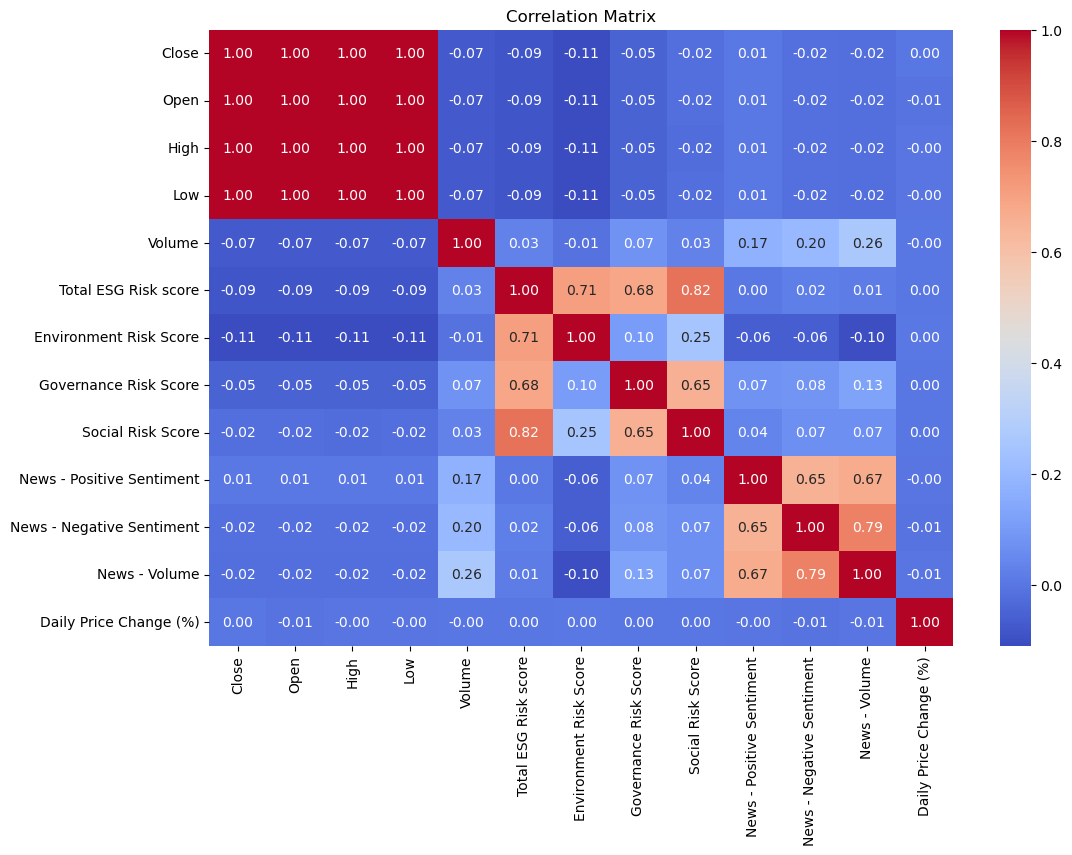

Linear Regression Coefficients:
                     Feature  Coefficient
2      Governance Risk Score     0.055802
1     Environment Risk Score     0.054817
3          Social Risk Score     0.052883
4  News - Positive Sentiment     0.000142
6              News - Volume    -0.000020
5  News - Negative Sentiment    -0.000630
0       Total ESG Risk score    -0.053820


<Figure size 1000x600 with 0 Axes>

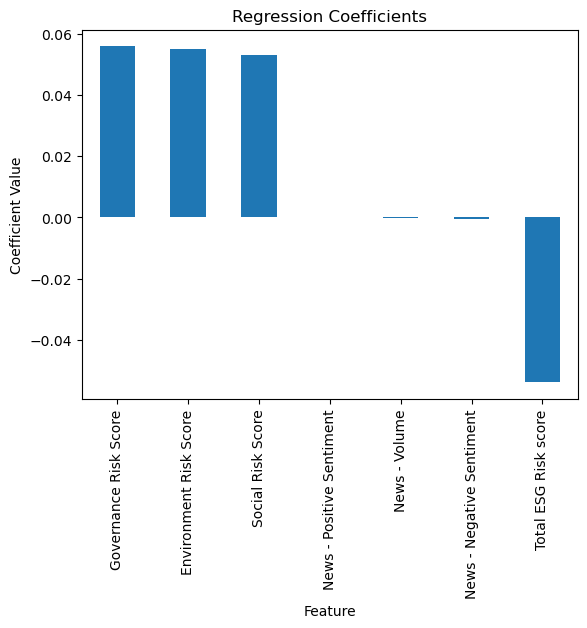

In [5]:
print(SP_Stock.columns)
print(SNES_cleaned.columns)
print(ESG_cleaned.columns)

from sklearn.linear_model import LinearRegression

merged_data = SP_Stock.merge(ESG_cleaned, how='left', on='Symbol')
merged_data = merged_data.merge(SNES_cleaned, how='left', on=['Date', 'Symbol'])

print(merged_data.columns)

# Prepare data for correlation analysis
correlation_data = merged_data[['Close', 'Open', 'High', 'Low', 'Volume', 
                                'Total ESG Risk score', 'Environment Risk Score', 
                                'Governance Risk Score', 'Social Risk Score', 
                                'News - Positive Sentiment', 'News - Negative Sentiment', 
                                'News - Volume']].dropna()

# Add daily percentage price change
correlation_data['Daily Price Change (%)'] = ((correlation_data['Close'] - correlation_data['Open']) / correlation_data['Open']) * 100

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Prepare data for multivariate regression analysis
X = correlation_data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 
                      'Social Risk Score', 'News - Positive Sentiment', 'News - Negative Sentiment', 
                      'News - Volume']]
y = correlation_data['Daily Price Change (%)']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display regression results
print("Linear Regression Coefficients:")
print(coefficients)

# Visualize coefficients
plt.figure(figsize=(10, 6))
coefficients.set_index('Feature').plot(kind='bar', legend=False)
plt.title("Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

## Time Series Analysis

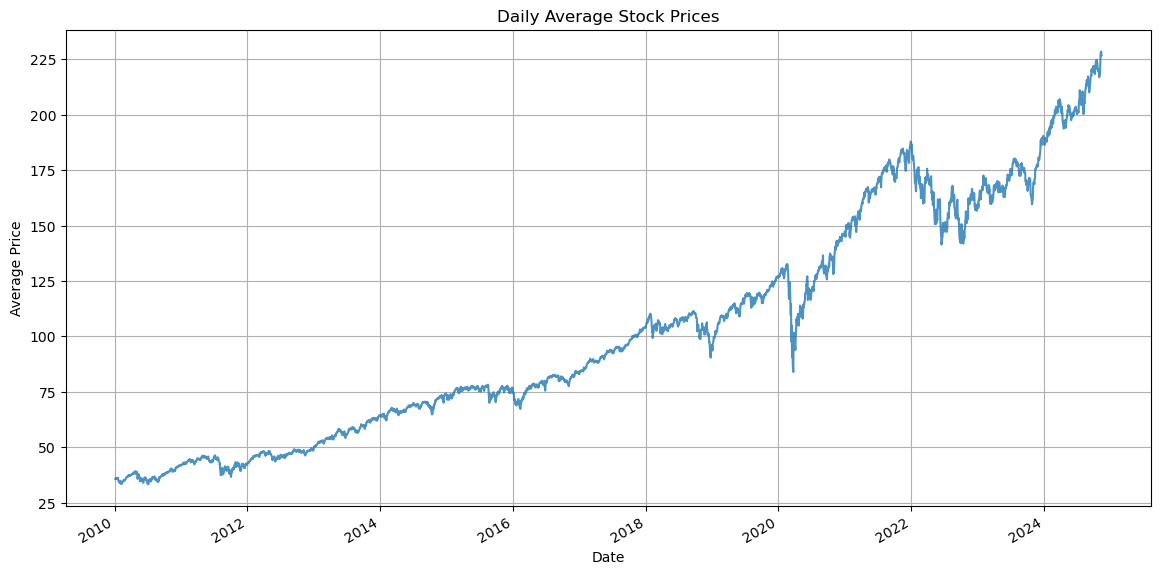

<Figure size 1400x700 with 0 Axes>

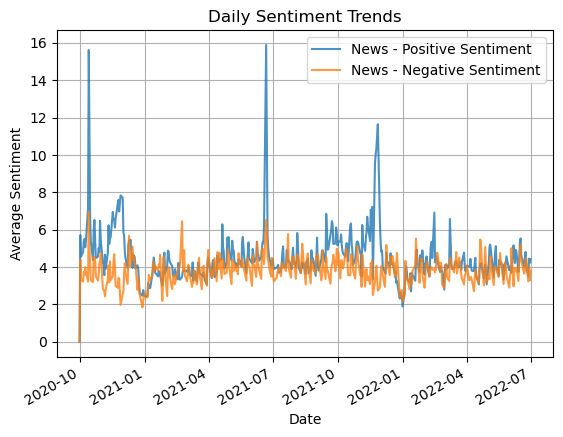

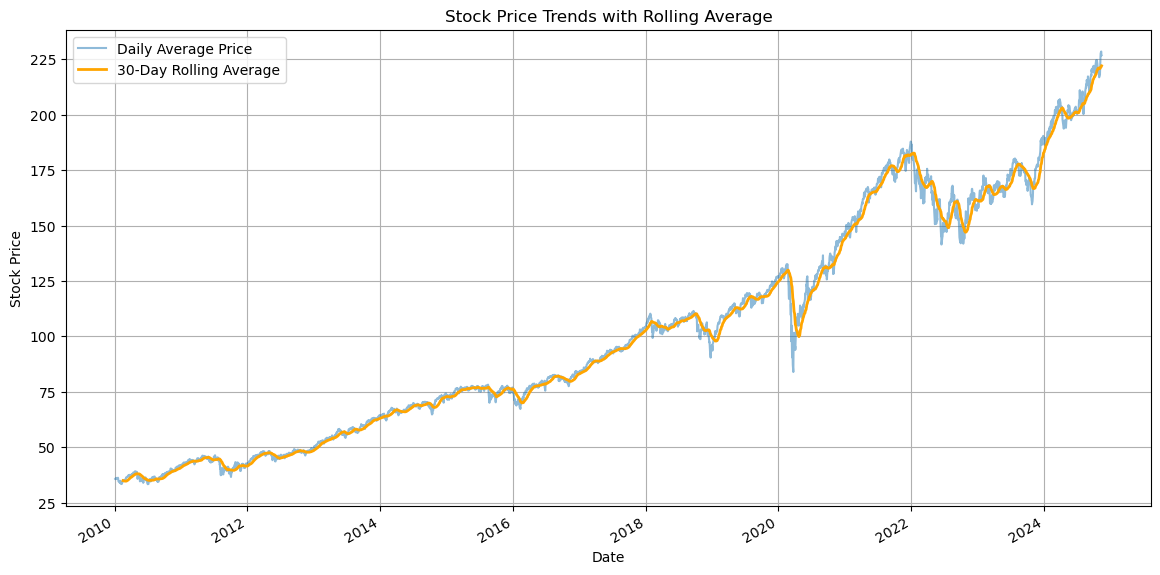

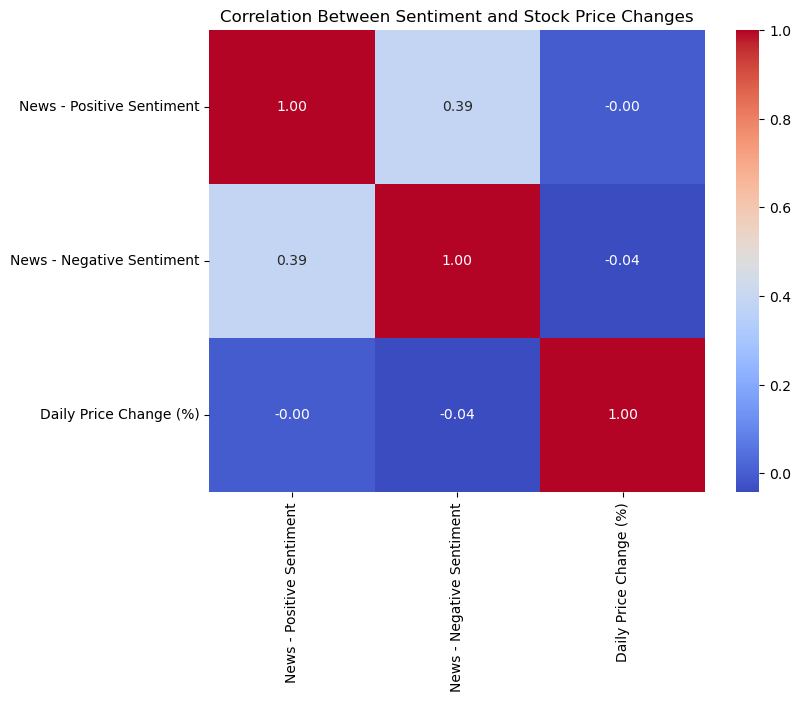

Correlation Matrix:
                            News - Positive Sentiment  \
News - Positive Sentiment                   1.000000   
News - Negative Sentiment                   0.389381   
Daily Price Change (%)                     -0.002311   

                           News - Negative Sentiment  Daily Price Change (%)  
News - Positive Sentiment                   0.389381               -0.002311  
News - Negative Sentiment                   1.000000               -0.041332  
Daily Price Change (%)                     -0.041332                1.000000  
Unique values in 'Controversy Level': [nan  0.]


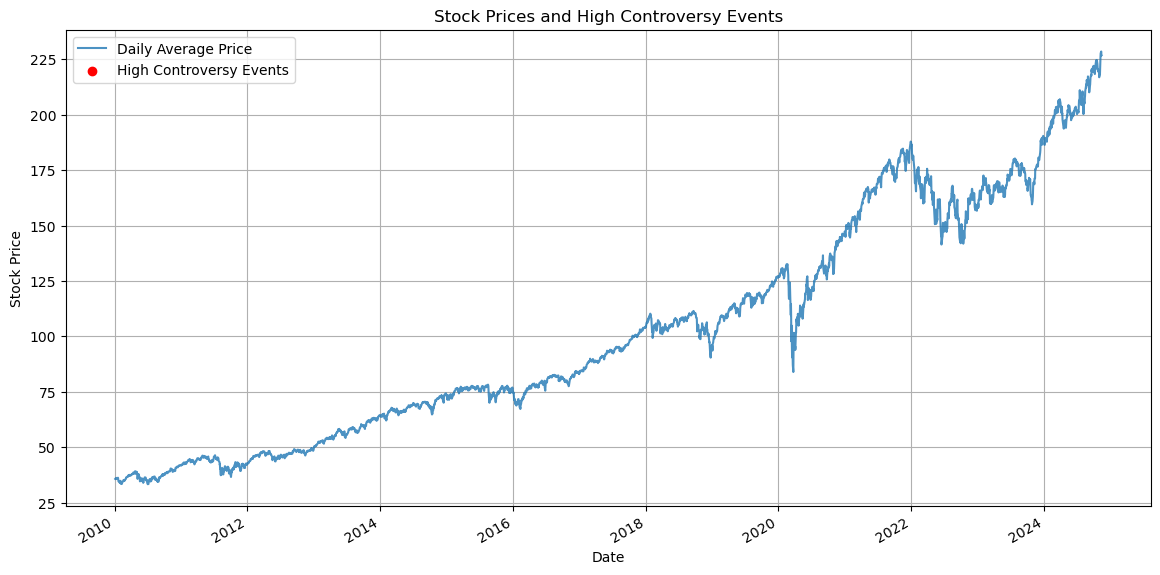

In [6]:
# Calculate the daily percentage change in stock prices
merged_data['Daily Price Change (%)'] = ((merged_data['Close'] - merged_data['Open']) / merged_data['Open']) * 100

# Ensure 'Date' is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Set 'Date' as the index for easier time series analysis
merged_data.set_index('Date', inplace=True)

# Compute daily averages for stock prices and sentiment scores
daily_avg_price = merged_data.groupby('Date')['Close'].mean()  # Average closing price
daily_sentiment = merged_data.groupby('Date')[
    ['News - Positive Sentiment', 'News - Negative Sentiment']
].mean()

# Compute average daily price change
daily_price_change = merged_data.groupby('Date')['Daily Price Change (%)'].mean()

# Combine sentiment and price change into a single DataFrame for analysis
daily_trends = pd.concat([daily_sentiment, daily_price_change], axis=1)

# Plot daily average stock price over time
plt.figure(figsize=(14, 7))
daily_avg_price.plot(title="Daily Average Stock Prices", ylabel="Average Price", xlabel="Date", alpha=0.8)
plt.grid()
plt.show()

# Plot daily sentiment trends over time
plt.figure(figsize=(14, 7))
daily_sentiment.plot(title="Daily Sentiment Trends", ylabel="Average Sentiment", xlabel="Date", alpha=0.8)
plt.grid()
plt.show()

# Compute 30-day rolling averages for smoother trends
rolling_avg_price = daily_avg_price.rolling(window=30).mean()

# Plot original vs. rolling average
plt.figure(figsize=(14, 7))
daily_avg_price.plot(label="Daily Average Price", alpha=0.5)
rolling_avg_price.plot(label="30-Day Rolling Average", linewidth=2, color="orange")
plt.title("Stock Price Trends with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Add daily price change to sentiment data
daily_sentiment['Daily Price Change (%)'] = daily_price_change

# Compute correlation matrix
correlation_over_time = daily_sentiment.corr()

# Display correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_over_time, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Between Sentiment and Stock Price Changes")
plt.show()

print("Correlation Matrix:\n", correlation_over_time)

# Convert 'Controversy Level' to numeric, coercing errors to NaN
merged_data['Controversy Level'] = pd.to_numeric(merged_data['Controversy Level'], errors='coerce')

# Check for any invalid values and drop them
print("Unique values in 'Controversy Level':", merged_data['Controversy Level'].unique())

# Proceed with filtering high controversy events
high_controversy_dates = merged_data[merged_data['Controversy Level'] > 4].index.unique()

# Plot stock prices with high controversy events highlighted
plt.figure(figsize=(14, 7))
daily_avg_price.plot(label="Daily Average Price", alpha=0.8)
plt.scatter(
    high_controversy_dates,
    daily_avg_price.loc[high_controversy_dates],
    color="red",
    label="High Controversy Events",
    zorder=5
)
plt.title("Stock Prices and High Controversy Events")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


# Ethics & Privacy

There are several ethical and privacy concerns associated with using public sentiment data, particularly from social media platforms. Social media data, especially from platforms like Twitter or Reddit, may include personally identifiable information (PII) or be subject to terms of use that limit how the data can be collected, stored, and analyzed. To avoid privacy violations, we would ensure that any data collection process adheres to platform-specific policies and anonymizes user data. Additionally, sentiment analysis tools should not extract or store user-specific information but should aggregate sentiment data at the company or market level.

Bias is another significant concern, particularly with public sentiment data. Social media users are not a fully representative sample of the population, and there may be inherent biases in who posts, which platforms are used, and which companies or sectors are discussed. For example, technology companies may be overrepresented in social media discussions compared to industrial or utilities companies. To mitigate this, we would compare sentiment data across multiple platforms and consider weighting sentiment scores by the volume of discussion relative to the sector’s overall market size.

ESG data also presents potential biases, as ESG scoring methodologies vary between providers, and the criteria used to assess companies can reflect subjective judgments. To address this, we would consider using multiple ESG data sources and cross-referencing scores to minimize provider-specific biases.

Lastly, when communicating the results of the analysis, we would need to be transparent about the limitations of the data, particularly the potential biases in social media sentiment and ESG scores. Additionally, we would avoid making deterministic claims about stock price movements, as stock markets are influenced by a multitude of factors beyond those in the dataset.

## Discusison and Conclusion

# Key Findings

Correlation Analysis:

The heatmap shows that ESG subcategories like governance and environment risk scores have moderate correlations among themselves but low correlation with daily price changes.
Public sentiment metrics (positive and negative sentiment) show minimal correlation with daily stock price changes.

Regression Coefficients:

The regression coefficients indicate that governance risk score and environment risk score have the largest positive contributions to predicting daily price changes.
Total ESG Risk Score shows a negative relationship, indicating companies with higher total ESG risk tend to have less favorable price changes.
Public sentiment (positive or negative) and news volume have very minimal impact in the model.

Time Series Trends:

The time series plots of daily average stock prices and rolling averages indicate long-term growth trends in S&P 500 stock prices.
Sentiment trends (positive and negative) show fluctuations that do not directly align with price changes, suggesting limited immediate impact.
Correlation Between Sentiment and Stock Price Changes:

The focused correlation heatmap reveals a near-zero correlation between sentiment metrics and daily price changes, indicating sentiment might not be a strong predictor for day-to-day fluctuations.

Hypothesis Evaluation:

Public Sentiment: Predicted to have the most immediate and significant impact on daily price movements.
ESG Scores: Expected to influence price movements more gradually, particularly for companies in sectors where ethical considerations matter.
Quarterly Earnings: Expected to cause short-term volatility around release dates, especially in financial and industrial sectors.

## Team Contributions

Andy - data cleaning for stock data, correlation and multivariate analysis, time series analysis, discussion and conclusion
Shane - data cleaning for ESG data, Background and Prior work, assisted with graphs